In [4]:
# importing python libraries

import matplotlib.pyplot as plt
import pandas as pd
from math import e
from math import log

In [5]:
# loading each traffic condition data from files 

green = pd.read_csv("./ModelingData/Green Data.csv")
greenNoOutliers = pd.read_csv("./ModelingData/Green Data No Outliers.csv")
greenOutliers = pd.read_csv("./ModelingData/Green Data Outliers.csv")

orange = pd.read_csv("./ModelingData/Orange Data.csv")
orangeNoOutliers = pd.read_csv("./ModelingData/Orange Data no Outliers.csv")
orangeOutliers = pd.read_csv("./ModelingData/Orange outliers.csv")

red = pd.read_csv("./ModelingData/Red Data.csv")
redNoOutliers = pd.read_csv("./ModelingData/Red Data no Outliers.csv")
redOutliers = pd.read_csv("./ModelingData/Red Data Outliers.csv")

brown = pd.read_csv("./ModelingData/Brown Data.csv")
brownNoOutliers = pd.read_csv("./ModelingData/Brown Data no outliers.csv")
brownOutliers = pd.read_csv("./ModelingData/Brown Data Outliers.csv")

# sorting values to plot on graph 

green = green.sort_values(by= ["Ideal", "Distance"])
greenNoOutliers = greenNoOutliers.sort_values(["Ideal", "Distance"])
greenOutliers = greenOutliers.sort_values(["Ideal", "Distance"])

orange = orange.sort_values(by= ["Ideal", "Distance"])
orangeNoOutliers = orangeNoOutliers.sort_values(["Ideal", "Distance"])
orangeOutliers = orangeOutliers.sort_values(["Ideal"])

red = red.sort_values(by= ["Ideal", "Distance"])
redNoOutliers = redNoOutliers.sort_values(["Ideal"])
redOutliers = redOutliers.sort_values(["Ideal", "Distance"])

brown = brown.sort_values(by= ["Ideal", "Distance"])
brownNoOutliers = brownNoOutliers.sort_values(["Ideal", "Distance"])
brownOutliers = brownOutliers.sort_values(["Ideal", "Distance"])

In [11]:
# defining all functions 

def GRPOLY(x):
    y = 0.0191*x**2 + 0.7259*x + 1.877
    return y

def GRLIN(x):
    y = 0.9577*x + 1.492
    return y

def GREXP(x):
    y = 2.3648*e**(.1582*x)
    return y

def GRPOLYO(x):
    y = 0.0363*x**2 + 0.5133*x + 2.0385
    return y

def GRLINO(x):
    y = 0.9541*x + 1.3312
    return y

def GREXPO(x):
    y = 2.2626*e**(.1579*x)
    return y

def ORPOLY(x):
    y = -0.012*x**2 + 1.7786*x + 1.626
    return y

def ORLIN(x):
    y = 1.6104*x + 1.8366
    return y

def OREXP(x):
    y = 2.9632*e**(.173*x)
    return y

def ORPOLYO(x):
    y = 0.0085*x**2 + 1.5105*x + 1.4881
    return y

def ORLINO(x):
    y = 1.6301*x + 1.3444
    return y

def OREXPO(x):
    y = 2.618*e**(.1775*x)
    return y

def REPOLY(x):
    y = -0.1199*x**2 + 3.8488*x + .2412
    return y

def RELIN(x):
    y = 3.1197*x + .7191
    return y

def REEXP(x):
    y = 1.8277*e**(.4525*x)
    return y

def REPOLYO(x):
    y = -0.1159*x**2 + 3.6857*x + .459
    return y

def RELINO(x):
    y = 2.9636*x + .9105
    return y

def REEXPO(x):
    y = 1.8561*e**(.4382*x)
    return y

def BRPOLY(x):
    y = -0.3241*x**2 + 8.4883*x - 0.0873
    return y

def BRLIN(x):
    y = 6.6632*x + 1.0232
    return y

def BREXP(x):
    y = 2.5026*e**(.6131*x)
    return y

def BRPOLYO(x):
    y = -0.0706*x**2 + 6.8238*x + .6252
    return y

def BRLINO(x):
    y = 6.4177*x + .8515
    return y

def BREXPO(x):
    y = 2.4188*e**(.5868*x)
    return y

# AIC Calculation

def AIC(poly, lin, exp, ideal, actual, color, outliers=False):
    rssP = 0
    rssL = 0
    rssE = 0
    for i in range(len(ideal)):
        x = float(ideal[i])
        y = float(actual[i])
        rssP += (poly(x) - y)**2
        rssL += (lin(x) - y)**2
        rssE += (exp(x) - y)**2

    n = len(ideal)
    kP = 3
    kL = 2
    kE = 2
    aicP = 2*kP + n*log(rssP/n)
    aicL = 2*kL + n*log(rssL/n)
    aicE = 2*kE + n*log(rssE/n)
    
    if (outliers):
        outliers = "with outliers"
    else:
        outliers = "without outliers" 
    
    print("{0}: {1}".format(color, outliers))
    print(" Polynomial: ", aicP,"\n     Linear: ", aicL, "\nExponential: ", aicE, "\n")
    
def plot(ax, ideal, actual, poly, lin, exp, name):
    #fig.suptitle('Modeling Traffic Conditions with All Data', size=20)
    #ax1.set_title('Green Traffic: Ideal vs Actual Travel Time')
    ax.set_xlabel('Ideal Travel Time (min)')
    ax.set_ylabel("Actual Travel Time (min)")
    ax.plot(ideal, actual, c='black', label="Collected Data")
    ax.plot(ideal, lin, c='tomato', label="Linear")
    ax.plot(ideal, poly, c='royalblue', label="Polynomial")
    ax.plot(ideal, exp, c='limegreen', label="Exponential")
    #ax.plot(ideal, actual, c='midnightblue')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    
    ax.text(0.65, 0.93, name, ha = "center", va="center", transform=ax.transAxes, fontsize=20, color="darkgrey")

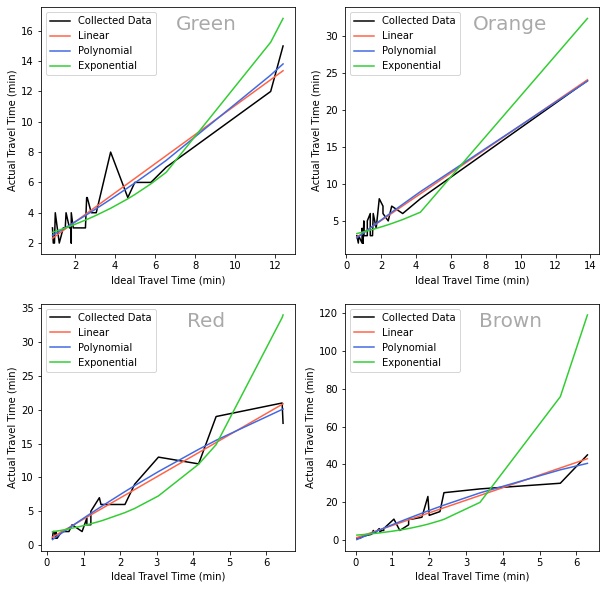

In [8]:
# Got this code from towardsdatascience.com and matplotlib.org

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create Three Axes Objects
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Edit gridspec to change hspace and wspace
gs = fig.add_gridspec(nrows=2, ncols=2, hspace=0.5, wspace=0.5)

#Green
grIdeal = green["Ideal"]
grActual = green["Actual"]

grPoly = []
grLin = []
grExp = []

for x in grIdeal:
    y = GRPOLY(x)
    grPoly.append(y)
    
    y = GRLIN(x)
    grLin.append(y)
    
    y = GREXP(x)
    grExp.append(y)

# Orange 
orIdeal = orange["Ideal"]
orActual = orange["Actual"]

orPoly = []
orLin = []
orExp = []

for x in orIdeal:
    y = ORPOLY(x)
    orPoly.append(y)
    
    y = ORLIN(x)
    orLin.append(y)
    
    y = OREXP(x)
    orExp.append(y)
    
# Red
reIdeal = red["Ideal"]
reActual = red["Actual"]

rePoly = []
reLin = []
reExp = []

for x in reIdeal:
    y = REPOLY(x)
    rePoly.append(y)
    
    y = RELIN(x)
    reLin.append(y)
    
    y = REEXP(x)
    reExp.append(y)

# Brown
brIdeal = brown["Ideal"]
brActual = brown["Actual"]

brPoly = []
brLin = []
brExp = []

for x in brIdeal:
    y = BRPOLY(x)
    brPoly.append(y)
    
    y = BRLIN(x)
    brLin.append(y)
    
    y = BREXP(x)
    brExp.append(y)
    
plot(ax1, grIdeal, grActual, grPoly, grLin, grExp, "Green")
plot(ax2, orIdeal, orActual, orPoly, orLin, orExp, "Orange")
plot(ax3, reIdeal, reActual, rePoly, reLin, reExp, "Red")
plot(ax4, brIdeal, brActual, brPoly, brLin, brExp, "Brown")

#plt.show()
plt.savefig('Traffic Data Final.png',dpi=300,format='png',bbox_inches='tight')

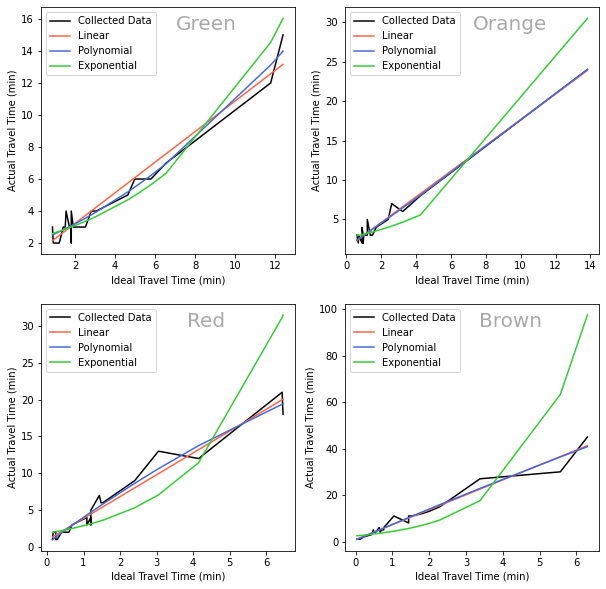

In [9]:
## Now for no outliers 

# Got this code from towardsdatascience.com and matplotlib.org

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create Three Axes Objects
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Edit gridspec to change hspace and wspace
gs = fig.add_gridspec(nrows=2, ncols=2, hspace=0.5, wspace=0.5)

#Green
grIdeal = greenNoOutliers["Ideal"]
grActual = greenNoOutliers["Actual"]

grPoly = []
grLin = []
grExp = []

for x in grIdeal:
    y = GRPOLYO(x)
    grPoly.append(y)
    
    y = GRLINO(x)
    grLin.append(y)
    
    y = GREXPO(x)
    grExp.append(y)

# Orange 
orIdeal = orangeNoOutliers["Ideal"]
orActual = orangeNoOutliers["Actual"]

orPoly = []
orLin = []
orExp = []

for x in orIdeal:
    y = ORPOLYO(x)
    orPoly.append(y)
    
    y = ORLINO(x)
    orLin.append(y)
    
    y = OREXPO(x)
    orExp.append(y)
    
# Red
reIdeal = redNoOutliers["Ideal"]
reActual = redNoOutliers["Actual"]

rePoly = []
reLin = []
reExp = []

for x in reIdeal:
    y = REPOLYO(x)
    rePoly.append(y)
    
    y = RELINO(x)
    reLin.append(y)
    
    y = REEXPO(x)
    reExp.append(y)

# Brown
brIdeal = brownNoOutliers["Ideal"]
brActual = brownNoOutliers["Actual"]

brPoly = []
brLin = []
brExp = []

for x in brIdeal:
    y = BRPOLYO(x)
    brPoly.append(y)
    
    y = BRLINO(x)
    brLin.append(y)
    
    y = BREXPO(x)
    brExp.append(y)
    
plot(ax1, grIdeal, grActual, grPoly, grLin, grExp, "Green")
plot(ax2, orIdeal, orActual, orPoly, orLin, orExp, "Orange")
plot(ax3, reIdeal, reActual, rePoly, reLin, reExp, "Red")
plot(ax4, brIdeal, brActual, brPoly, brLin, brExp, "Brown")

#plt.show()
plt.savefig('Traffic Data Final noOutliers.png',dpi=300,format='png',bbox_inches='tight')

In [12]:
AIC(GRPOLY, GRLIN, GREXP, green["Ideal"], green["Actual"], "Green", True )
AIC(GRPOLYO, GRLINO, GREXPO, greenNoOutliers["Ideal"], greenNoOutliers["Actual"], "Green")


AIC(ORPOLY, ORLIN, OREXP, orange["Ideal"], orange["Actual"], "Orange", True )
AIC(ORPOLYO, ORLINO, OREXPO, orangeNoOutliers["Ideal"], orangeNoOutliers["Actual"], "Orange")


AIC(REPOLY, RELIN, REEXP, red["Ideal"], red["Actual"], "Red", True )
AIC(REPOLYO, RELINO, REEXPO, redNoOutliers["Ideal"], redNoOutliers["Actual"], "Red")


AIC(BRPOLY, BRLIN, BREXP, brown["Ideal"], brown["Actual"], "Brown", True )
AIC(BRPOLYO, BRLINO, BREXPO, brownNoOutliers["Ideal"], brownNoOutliers["Actual"], "Brown")

Green: with outliers
 Polynomial:  0.24650242833559677 
     Linear:  -0.44882893755809405 
Exponential:  13.503018131627055 

Green: without outliers
 Polynomial:  -24.499831347394117 
     Linear:  -17.78950524893526 
Exponential:  -10.846209508009837 

Orange: with outliers
 Polynomial:  16.56131996991935 
     Linear:  14.760841353844555 
Exponential:  49.07604269211865 

Orange: without outliers
 Polynomial:  -4.995078217693109 
     Linear:  -6.789881765000072 
Exponential:  30.15514527594202 

Red: with outliers
 Polynomial:  18.658873337331805 
     Linear:  19.22816989055636 
Exponential:  89.23429772703673 

Red: without outliers
 Polynomial:  3.930217260153193 
     Linear:  5.35518486224238 
Exponential:  74.514778316474 

Brown: with outliers
 Polynomial:  69.09385570596032 
     Linear:  70.04019053909273 
Exponential:  172.46470927027462 

Brown: without outliers
 Polynomial:  41.756300730935294 
     Linear:  39.97152023784962 
Exponential:  140.15306488952632 

